# TD Vectorisation de texte et représentation graphique

Dans ce TD, nous nous intéressons à la représentation vectorielle de texte à partir de la méthode [Bag of words](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Nous étudierons les effets des différents paramètres sur la représentation obtenue. Nous étudierons également deux méthodes pour représenter graphiquement des données vectorielles de grande dimension.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os,os.path
%matplotlib inline

## L'ensemble de textes : 20 newsgroups

Dans ce TD, nous utiliserons l'ensemble de textes qui se nomme « 20 newsgroups ». C'est une collection d'environ 20000 documents de groupes de discussion, répartis (presque) uniformément dans 20 groupes de discussion différents. Cet ensemble de textes est devenu populaire pour les expériences de Machine learning dans les applications de texte, telles que la classification de texte et le regroupement de texte.

Pour plus de detaille : http://qwone.com/~jason/20Newsgroups/

In [2]:
from sklearn.datasets import fetch_20newsgroups

**Question -** Chargez un échantillon de l'ensemble de textes avec les paramètres suivants ([sklearn.datasets.fetch_20newsgroups()](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html)) :
- uniquement les catégories : 'alt.atheism', 'soc.religion.christian','comp.graphics' et 'sci.med'
- le sous-ensemble d'entrainement ('train')

In [3]:
categories=['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories)

La variable `twenty_train`, contient les 3 sous-variables suivantes :
- **`twenty_train.target_names`** : la liste des noms de sujet
- **`twenty_train.target`** : la liste des indexs des sujets pour chaque message
- **`twenty_train.data`** : la liste des messages

**Question -** Afficher la liste des des noms de sujet, les noms de sujet des 20 premiers messages et le texte de quelques messages ([print()](https://docs.python.org/3/tutorial/inputoutput.html), [string.join()](https://docs.python.org/3.5/library/string.html), [repr()](https://docs.python.org/3.5/library/functions.html?highlight=repr#repr))


In [4]:
print('Liste des noms de sujet : ' + ', '.join(twenty_train.target_names))
print()
print('Sujet des 20 premiers messages : ' + ', '.join([twenty_train.target_names[twenty_train.target[i]] for i in range(20)]))
print()
print('Exemple de message :\n' + '\n\n'.join([repr(twenty_train.data[i]) for i in (1,25,256)]))

Liste des noms de sujet : alt.atheism, comp.graphics, sci.med, soc.religion.christian

Sujet des 20 premiers messages : comp.graphics, comp.graphics, soc.religion.christian, soc.religion.christian, soc.religion.christian, soc.religion.christian, soc.religion.christian, sci.med, sci.med, sci.med, soc.religion.christian, comp.graphics, alt.atheism, alt.atheism, comp.graphics, comp.graphics, sci.med, alt.atheism, soc.religion.christian, alt.atheism

Exemple de message :
"From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the problem:\n\tI have a rectangular mesh in the uv domain, i.e  the mesh is a \n\tmapping of a 3d Bezier patch into 2d. The area in this domain\n\twhich is inside a trimming loop had to be rendered. The trimming\n\tloop is a set of 2d Bezier curve 

**Analyse -** Que remarquez-vous sur le contenu des messages (Attention ! Utiliser la fonction **`repr()`**) ? Peut-on les utiliser directement sous cette forme ?

## Bag of words
### Création du dictionnaire

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

**Question -** Créez un `CountVectorizer` et utilisez le corpus de texte pour apprendre le dictionnaire de vectorisation ([CountVectorizer.fit()](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit)).

In [6]:
vectorizer = CountVectorizer()
vectorizer.fit(twenty_train.data);

**Question -** Quelle est la taille du dictionnaire obtenu (`CountVectorizer.vocabulary_`) ? Affichez les 500 premiers mots du dictionnaire, que pouvez-vous en conclure ?

In [7]:
print('Nombre de mots dans le disctionnaire :', len(vectorizer.vocabulary_))
print(' '.join([list(vectorizer.vocabulary_.keys())[i] for i in range(1000)]))

Nombre de mots dans le disctionnaire : 35788
from sd345 city ac uk michael collier subject converting images to hp laserjet iii nntp posting host hampton organization the university lines 14 does anyone know of good way standard pc application pd utility convert tif img tga files into format we would also like do same hpgl plotter please email any response is this correct group thanks in advance programmer computer unit tel 071 477 8000 x3769 london fax 8565 ec1v 0hb ani ms uky edu aniruddha deglurkar help splitting trimming region along mesh kentucky dept math sciences 28 hi have problem hope some gurus can me solve background rectangular uv domain mapping 3d bezier patch 2d area which inside loop had be rendered set curve segments for sake notation made up cells my has split individual smaller bounded by if cell wholly then it output as whole else trivially rejected body how thiss done or there algo somewhere doing appreciated get irritated human stay cool divine djohnson cs ucsd dar

**Question -** Écrivez la fonction `preprocess_text(mess)`, qui permet de prétraiter les textes ([str.replace()](https://docs.python.org/3.5/library/stdtypes.html?highlight=replace#str.replace)).

In [8]:
def preprocess_text(mess):
    mess = mess.replace('_',' ')
    return mess

Nous surchargons la fonction `build_analyzer` de la classe `CountVectorizer` pour y ajouter notre prétraitement.

In [9]:
class CountVectorizerV2(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizerV2, self).build_analyzer()
        return lambda doc: analyzer(preprocess_text(doc))

**Question -** Créez un `CountVectorizerV2` et utilisez le corpus de texte pour apprendre le dictionnaire de vectorisation ([CountVectorizer.fit()](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit)).

Quelle est la nouvelle taille du dictionnaire obtenu ? Affichez les nouveaux 500 premiers mots du dictionnaire, cela vous semble-t-il mieux ?

In [10]:
vectorizer = CountVectorizerV2()
vectorizer.fit(twenty_train.data)
print('Nombre de mots dans le disctionnaire :', len(vectorizer.vocabulary_))
print(' '.join([list(vectorizer.vocabulary_.keys())[i] for i in range(1000)]))

Nombre de mots dans le disctionnaire : 35179
from sd345 city ac uk michael collier subject converting images to hp laserjet iii nntp posting host hampton organization the university lines 14 does anyone know of good way standard pc application pd utility convert tif img tga files into format we would also like do same hpgl plotter please email any response is this correct group thanks in advance programmer computer unit tel 071 477 8000 x3769 london fax 8565 ec1v 0hb ani ms uky edu aniruddha deglurkar help splitting trimming region along mesh kentucky dept math sciences 28 hi have problem hope some gurus can me solve background rectangular uv domain mapping 3d bezier patch 2d area which inside loop had be rendered set curve segments for sake notation made up cells my has split individual smaller bounded by if cell wholly then it output as whole else trivially rejected body how thiss done or there algo somewhere doing appreciated get irritated human stay cool divine djohnson cs ucsd dar

### Réduction du nombre de mots dans le dictionnaire

Pour réduire le nombre de mots dans le dictionnaire, nous allons étudier la fréquence d'apparition des mots dans les documents  *document frequency* en anglais.

**Question -** Utilisez la fonction [CountVectorizer.transform()](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform) pour vectoriser les documents du corpus de texte. 

In [11]:
X = vectorizer.transform(twenty_train.data)

**Question -** Ecrivez la fonction `compute_document_frequency` qui calcule la fréquence d'apparition de chaque mot dans les documents ([numpy.mean()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)).

In [12]:
def compute_document_frequency(X):
    
    df = np.mean(X>0, axis=0)
    df = np.asarray(df).reshape(-1) # convertie un numpy.matrix en numpy.ndarray
    return df

**Question -** Affichez l'histogramme de la fréquence d'apparition des mots dans les documents du corpus de texte ([matplotlib.pyplot.hist()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist))

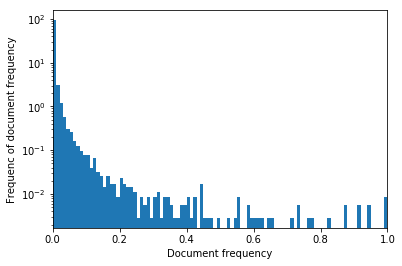

In [13]:
df = compute_document_frequency(X)

fig = plt.figure();
ax = fig.gca();
ax.hist(df,100,normed=True);
ax.set_yscale('log');
ax.set_xbound([0,1]);
ax.set_xlabel('Document frequency');
ax.set_ylabel('Frequenc of document frequency');


**Analyse -** Qu'est-ce que cela signifie ? Est-il intéressant d'avoir des mots avec une fréquence proche de 1 ou de 0 ? Quel est d'effet de ces mots sur la distance euclidienne entre la représentions vectorielle de deux textes ?

**Question -** A l'aide du parametres `stop_words` de la classe [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), ajouter la liste des **stop_words** de la langue anglaise
Quelle est la taille du dictionnaire alors obtenu ?
Afficher alors le nouvelle l'histogramme de la fréquence d'apparition des mots dans les documents du corpus de texte ([matplotlib.pyplot.hist()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)).

Que remarquez-vous ?

Nombre de mots dans le disctionnaire : 34873


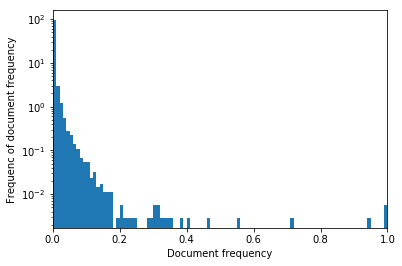

In [14]:
vectorizer = CountVectorizerV2(stop_words='english')
vectorizer.fit(twenty_train.data)
print('Nombre de mots dans le disctionnaire :', len(vectorizer.vocabulary_))

X = vectorizer.transform(twenty_train.data)
df = compute_document_frequency(X)

fig = plt.figure();
ax = fig.gca();
ax.hist(df,100,normed=True);
ax.set_yscale('log');
ax.set_xbound([0,1]);
ax.set_xlabel('Document frequency');
ax.set_ylabel('Frequenc of document frequency');

Nous avons vu en cours qu'il existe pour chaque langue et pour un grand nombre de mots de cette langue un sous-ensemble de mots dérivés.  Pour réduire la taille du vocabulaire, nous conservons l'élément racine de ces sous ensembles.

Pour cela nous ajoutons une étape de [racinisation](http://fr.wikipedia.org/wiki/Racinisation) à notre `CountVectorizer`.

In [19]:
import nltk.stem
english_stemmer=nltk.stem.SnowballStemmer('english')
class EnglishStemmedCountVectorizer(CountVectorizer): #EnglishStemmedCountVectorizer hérite de CountVectorizer
    def build_analyzer(self):
        analyzer = super(EnglishStemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(preprocess_text(doc)))

**Question -** Avec notre nouveau `EnglishStemmedCountVectorizer`, quelle est la taille du dictionnaire alors obtenu ?
Affichez alors le nouvel l'histogramme de la fréquence d'apparition des mots dans les documents du corpus de texte ([matplotlib.pyplot.hist()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)).

Que remarquez-vous ?

Nombre de mots dans le disctionnaire : 26271


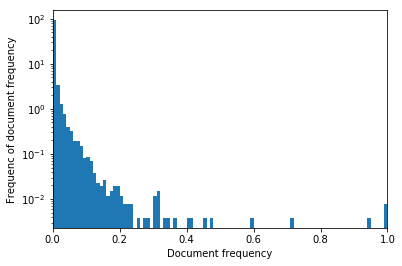

In [20]:
vectorizer = EnglishStemmedCountVectorizer(stop_words='english')
vectorizer.fit(twenty_train.data)
print('Nombre de mots dans le disctionnaire :', len(vectorizer.vocabulary_))

X = vectorizer.transform(twenty_train.data)
df = compute_document_frequency(X)

fig = plt.figure();
ax = fig.gca();
ax.hist(df,100,normed=True);
ax.set_yscale('log');
ax.set_xbound([0,1]);
ax.set_xlabel('Document frequency');
ax.set_ylabel('Frequenc of document frequency');

**Question -** A l'aide de la fonction [CountVectorizer.inverse_transform()](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.inverse_transform), quels sont les mots du dictionnaire qui ont une fréquence trop grande (par exemple avec un df > 0.25) ?

In [21]:
print('Liste des mots trop fréquents dans les documents : ' + ', '.join(vectorizer.inverse_transform(df>0.25)[0]))

Liste des mots trop fréquents dans les documents : articl, com, doe, don, edu, host, just, know, like, line, make, nntp, organ, peopl, post, say, subject, think, time, univers, use, write


**Question -** A l'aide des parametres **`min_df`** et **`max_df`** de la classe [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), filtrer les mots avec des fréquences indésirables.

Quelle est la taille du dictionnaire alors obtenu ?

Affichez alors le nouvel l'histogramme de la fréquence d'apparition des mots dans les documents du corpus de texte ([matplotlib.pyplot.hist()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)).

Nombre de mots dans le disctionnaire : 1257


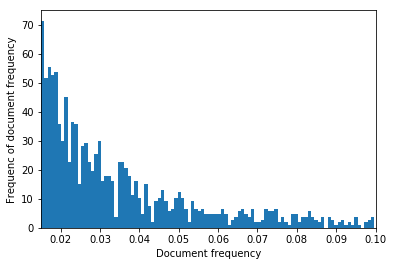

In [22]:
min_df=0.015
max_df=0.1

vectorizer = EnglishStemmedCountVectorizer(stop_words='english',min_df=min_df, max_df=max_df)
vectorizer.fit(twenty_train.data)
print('Nombre de mots dans le disctionnaire :', len(vectorizer.vocabulary_))

X = vectorizer.transform(twenty_train.data).toarray()
df = compute_document_frequency(X)

fig = plt.figure();
ax = fig.gca();
ax.hist(df,100,normed=True);
#ax.set_yscale('log');
ax.set_xbound([min_df,max_df]);
ax.set_xlabel('Document frequency');
ax.set_ylabel('Frequenc of document frequency');

## Visualisation

Nous avons vu en cours qu'il est intéressant de visualiser les données pour juger de la qualité de la représentation. Il est possible de visualiser en regardant les dimensions de la représentation deux à deux avec la fonction suivante :

In [23]:
def plot_croises(X,y,target_names, threshold = 1.0):
    nb_class=len(np.unique(y))
    nb_feat=X.shape[1]
    if nb_feat%2:
        nrows=int((nb_feat-1)/2)
        ncols=nb_feat
    else:
        nrows=int(nb_feat/2)
        ncols=nb_feat-1
    plt.figure(figsize=(14, 10))
    col=['b','r','g','c','m','y','k']
    for t in range(nb_class):
        k=1
        for i in range(nb_feat-1):
            for j in range(i+1,nb_feat):
                plt.subplot(nrows,ncols,k)
                
                x_t = X[y == t,i]
                y_t = X[y == t,j]
                
                x_mean = np.mean(x_t)
                y_mean = np.mean(y_t)
                
                dist = (x_t-x_mean)**2 + (y_t-y_mean)**2
                
                
                dist_max = np.sort(dist)[int(np.floor((dist.shape[0]-1)*threshold))]
                
                plt.scatter(x_t[dist<dist_max], y_t[dist<dist_max], color=col[t],lw=2,marker='o',label=target_names[t])
                plt.ylabel('Dim. ' + str(j+1))
                plt.xlabel('Dim. ' + str(i+1))
                k=k+1
    plt.legend(bbox_to_anchor=(2,2))  
    plt.tight_layout()  
    

Nous pouvons alors visualiser les 6 premières dimensions de notre représentation par Bag of words

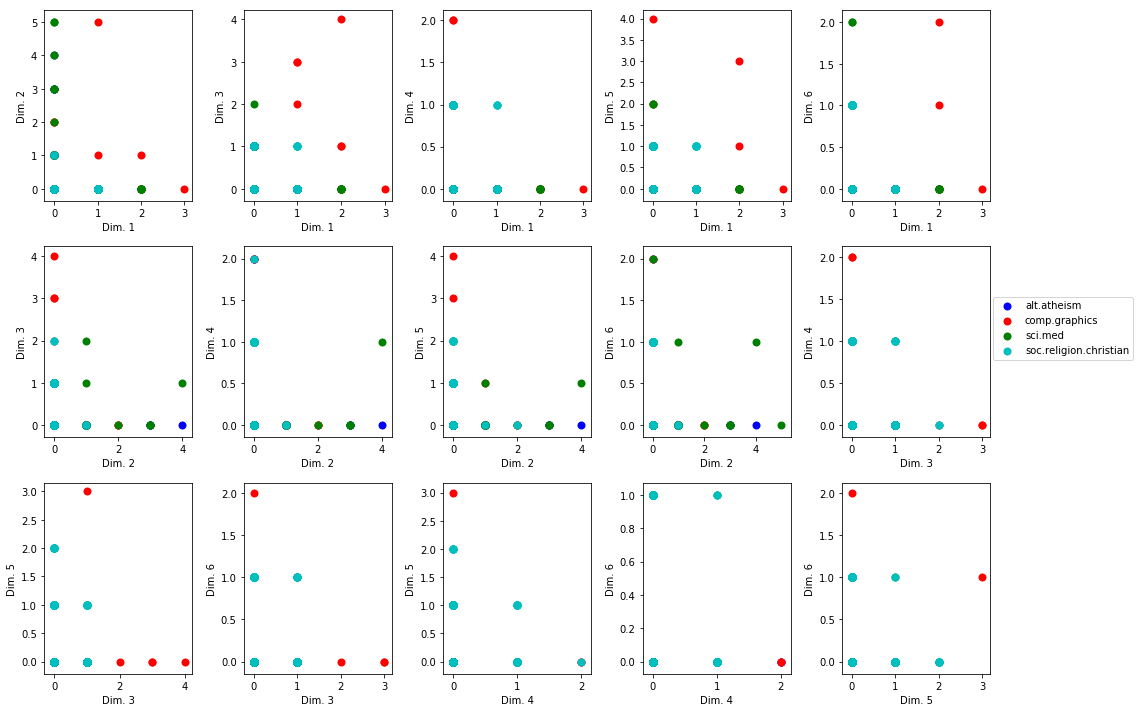

In [24]:
plot_croises(X[:,:6],twenty_train.target,twenty_train.target_names)

Cela fait déjà beaucoup de graphiques à analyser alors que nous regardons que les 6 premières dimensions

### Analyse en Composantes Principales

Une méthodes tres couramments utilisée qui permet de visualiser les données est l'utilisation de [Analyse en Composantes Principales](https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales)(ACP), qui est disponible dans [sklearn.decomposition.PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [25]:
from sklearn.decomposition import PCA

**Question** A l'aide de l'ACP, réduisez la dimension de la signature à 6 dimensions et visualisez-les deux à deux avec la fonction `plot_croises()`.

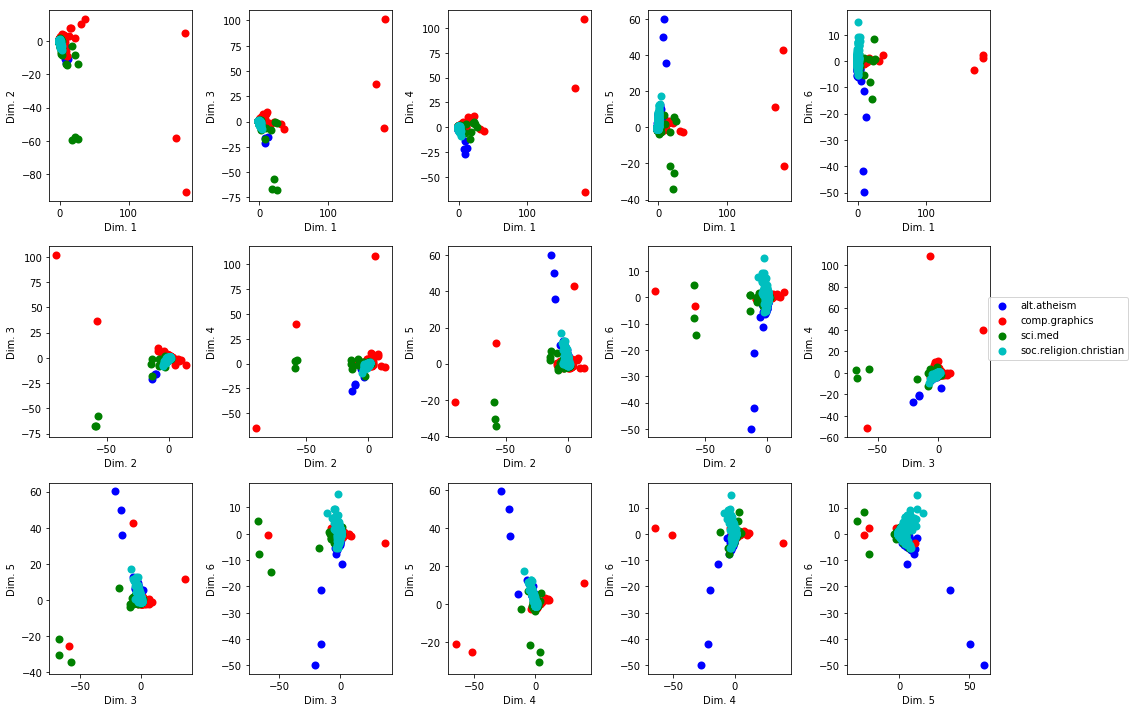

In [26]:
pca = PCA(n_components=6)#,whiten=True
pca.fit(X)
X_redui = pca.transform(X)
plot_croises(X_redui,twenty_train.target,twenty_train.target_names)

**Analyse -** Le résultat obtenu est-il lisible facilement lisible ? Pourquoi ? 

**Question -** Utilisez le paramètre `threshold` de la fonction d'affichage `plot_croises` pour supprimer les points trop éloignés de l'ensemble.

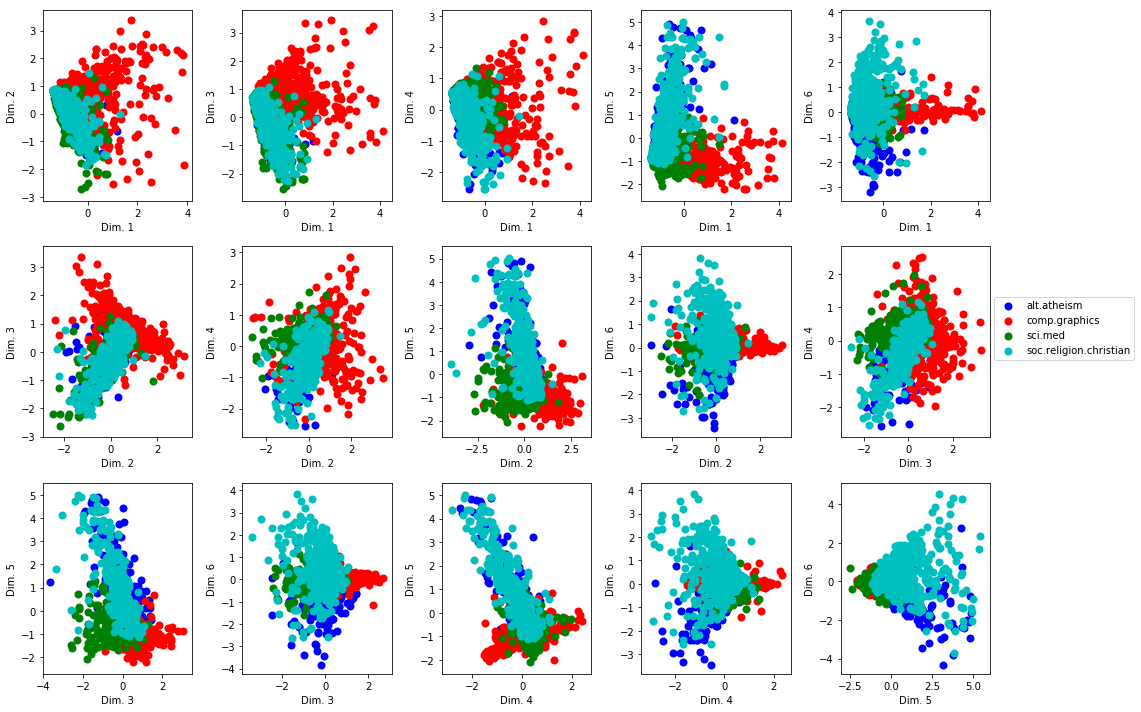

In [27]:
plot_croises(X_redui,twenty_train.target,twenty_train.target_names, threshold = 0.95)

**Analyse ** Quelles sujets de discutions peuvent être facilement séparés ? Peut-on en conlure qu'il sera difficile de séparer les autres sujets ?

## Discrimination par Plus Proches Voisins  (PPV)

### Méthode des plus proches voisins
Le principe est simple : pour une donnée dont on ne connait pas la classe mais seulement les caractéristiques, nous allons rechercher la donnée de la base complète (caractéristiques + classe) dont les caractéristiques sont les plus proches (au sens de la distance Euclidienne) et nous lui attribuerons la classe de cette donnée la plus proche.

### Mise en oeuvre

Les fonctions pour mettre en oeuvre la méthode des PPV et un code d'exemple sont donnés. Executez-les.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def perf_knn(Xtrain,ytrain,Xtest,ytest,k=1):
    knn=KNeighborsClassifier(k)
    knn.fit(Xtrain, ytrain)
    ctest=knn.predict(Xtest)
    cm = confusion_matrix(ytest, ctest) 
    accuracy=sum(np.diag(cm))/sum(sum(cm))
    erreur=1-accuracy
    plot_confusion_matrix(cm,twenty_train.target_names)
    print('exactitude = {0:.1%}.'.format(accuracy))
    print('taux d''erreur = {0:.1%}.'.format(erreur))
    

exactitude = 65.2%.
taux derreur = 34.8%.


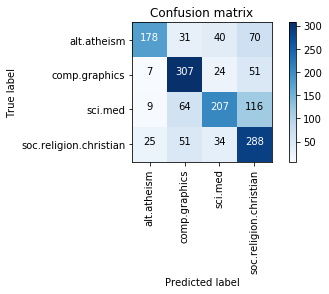

In [29]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories)

X_test = vectorizer.transform(twenty_test.data).toarray()

perf_knn(X,twenty_train.target,X_test,twenty_test.target,k=1)

**Analyse -** Analysez la matrice de confusion obtenue, le résultat est-il cohérent avec la visualisation obtenue en utilisant l'ACP ?

**Question -** Faites varier les parametres **`min_df`** et **`max_df`** de la classe [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) et observez les effets sur la visualisation et la matrice de confusion.